In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Membaca file
car_sales = pd.read_csv('Updated_Car_Sales_Data.csv')

In [ ]:
#Jumlah baris dan kolom
print(car_sales.shape)

(23000, 11)


In [ ]:
#Nama kolom
print(car_sales.columns.tolist())

['Car Make', 'Car Model', 'Year', 'Mileage', 'Price', 'Fuel Type', 'Color', 'Transmission', 'Options/Features', 'Condition', 'Accident']


Transmission
Automatic    11549
Manual       11451
Name: count, dtype: int64


<ipython-input-31-1785854806>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jual_by_transmission.index, y=jual_by_transmission.values, palette='viridis')


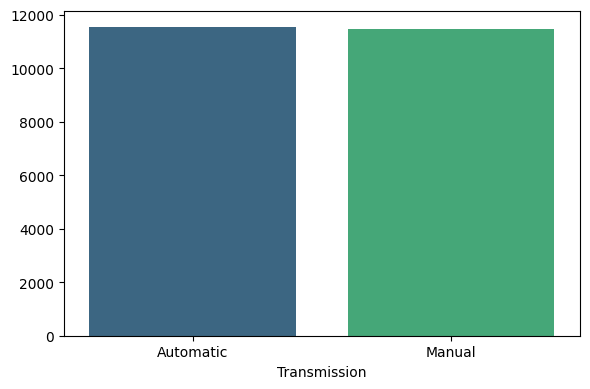

In [ ]:
#Penjualan mobil berdasarkan Transisi
jual_by_transmission = car_sales['Transmission'].value_counts()
print(jual_by_transmission)
plt.figure(figsize=(6, 4))
sns.barplot(x=jual_by_transmission.index, y=jual_by_transmission.values, palette='viridis')

plt.title =('Jumlah Penjualan Mobil Berdasarkan Tranmission')
plt.xlabel =('Jenis Transmission')
plt.ylabel =('Jumlah Penjualan')
plt.tight_layout()
plt.show()

Fuel Type
Hybrid      5764
Electric    5739
Diesel      5727
Gasoline    5024
Petrol       746
Name: count, dtype: int64


<ipython-input-9-3635976710>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Jual_by_fuel.index, y=Jual_by_fuel.values, palette='Set2')


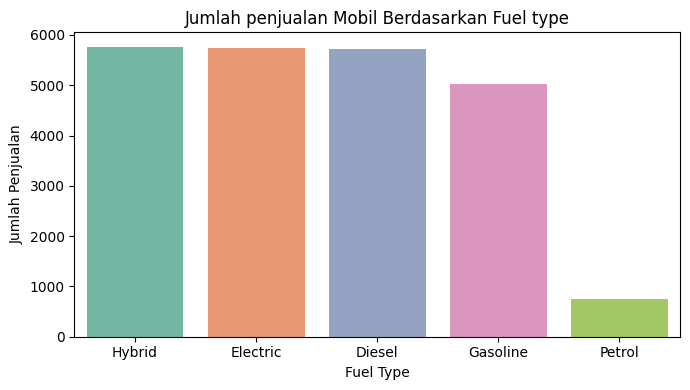

In [ ]:
#Penjualan mobil berdasarkan Fuel Type
Jual_by_fuel = car_sales['Fuel Type'].value_counts()
print(Jual_by_fuel)

plt.figure(figsize=(7, 4))
sns.barplot(x=Jual_by_fuel.index, y=Jual_by_fuel.values, palette='Set2')
plt.title('Jumlah penjualan Mobil Berdasarkan Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Jumlah Penjualan')
plt.tight_layout()
plt.show()

Feature_Count
1    8007
2    4949
3    5022
4    5022
Name: count, dtype: int64


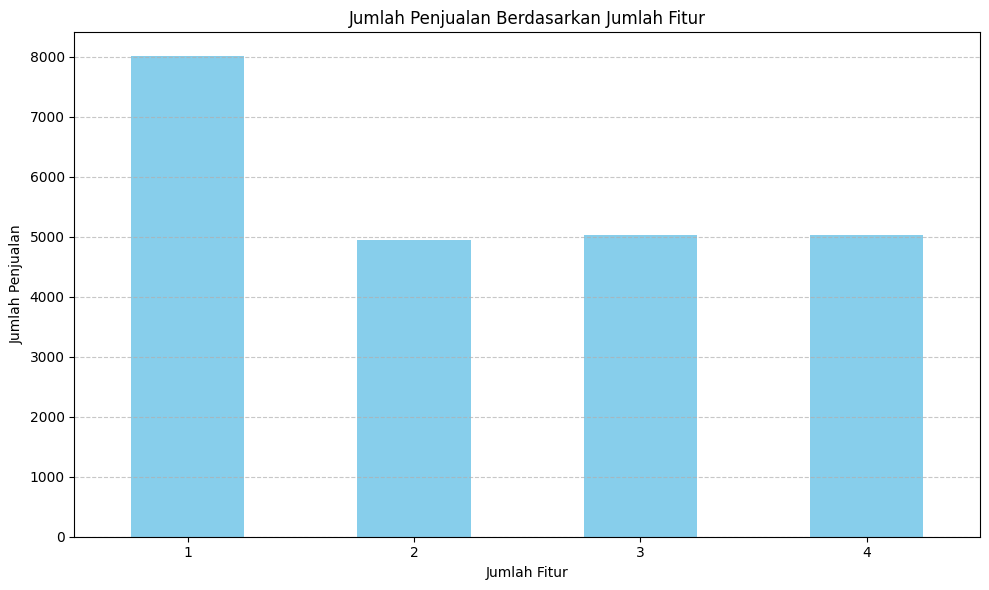

In [ ]:
#Menghitung jumlah penjualan mobil berdasarkan Features
car_sales['Feature_Count'] = car_sales['Options/Features'].fillna('').apply(lambda x: x.count(',') + 1 if x else 0)
Jual_by_features = car_sales['Feature_Count'].value_counts().sort_index()
print(Jual_by_features)

plt.figure(figsize=(10,6))
Jual_by_features.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penjualan Berdasarkan Jumlah Fitur')
plt.xlabel('Jumlah Fitur')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Membuat kategori berdasrkan harga
def kategorikan_harga(harga):
    if harga <20000:
        return 'Murah'
    elif harga <50000:
        return 'Sedang'
    else:
        return 'Mahal'

# Tambahkan kolom kategori harga
car_sales['Kategori_Harga'] = car_sales['Price'].apply(kategorikan_harga)

Kategori_Harga
Sedang    11463
Murah      8537
Mahal      3000
Name: count, dtype: int64


<ipython-input-18-880561235>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_harga_counts.index, y=kategori_harga_counts.values, palette='viridis')


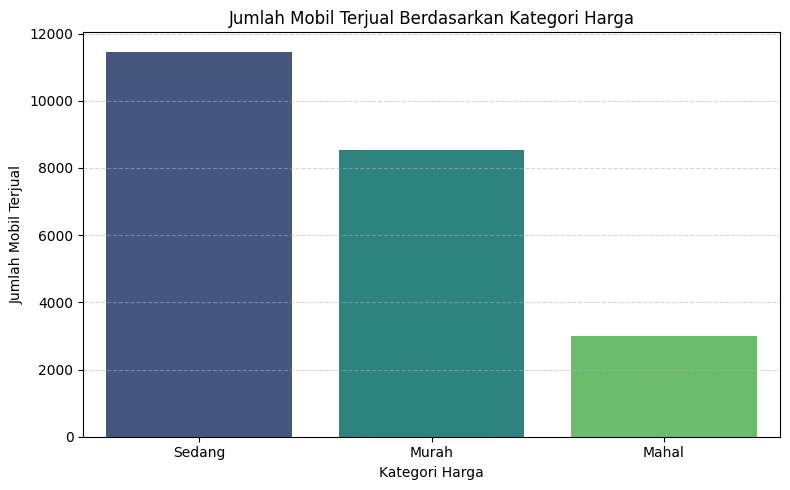

In [ ]:
#Penjualan mobil berdasarkan Kategori harga
car_sales['Kategori_Harga'] = car_sales['Price'].apply(kategorikan_harga)
kategori_harga_counts = car_sales['Kategori_Harga'].value_counts()
print(kategori_harga_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=kategori_harga_counts.index, y=kategori_harga_counts.values, palette='viridis')

# Judul dan label
plt.title('Jumlah Mobil Terjual Berdasarkan Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Mobil Terjual')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

Car Make
Porsche          1268
BMW              1033
Chevy            1022
Chrysler         1022
Mercedes         1017
Ford             1014
Fiat             1012
Honda            1007
Tesla            1006
Hyundai          1005
Land Rover       1003
Volkswagen       1001
Jaguar           1000
Chevrolet         997
Nissan            993
Subaru            990
Audi              989
Kia               987
Mazda             977
Toyota            959
Mercedes-Benz     319
Lamborghini       315
Maserati          314
Ferrari           311
Bentley           298
Bugatti           297
Aston Martin      291
McLaren           285
Rolls-Royce       268
Name: count, dtype: int64


<ipython-input-19-575366659>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bottom_df.values, y=top_bottom_df.index, palette='crest')


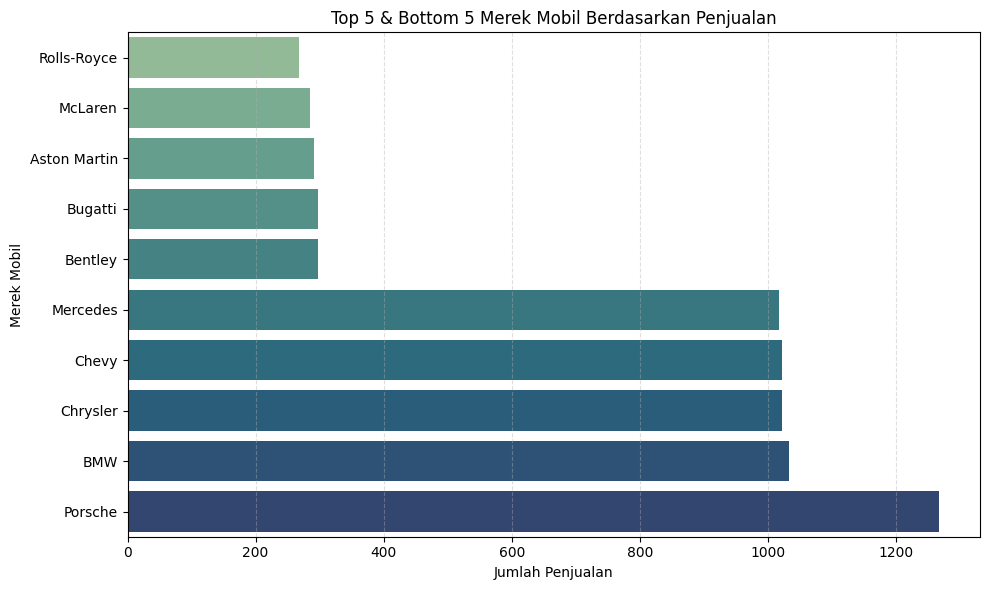

In [ ]:
#Penjualan mobil berdasarkan Car Make
Jual_by_car_make = car_sales['Car Make'].value_counts()
print(Jual_by_car_make)

# Ambil Top 5 Terlaris dan Bottom 5 Tergak Laris
top5 = Jual_by_car_make.head(5)
bottom5 = Jual_by_car_make.tail(5)

# Gabungkan jadi satu DataFrame
top_bottom_df = pd.concat([top5, bottom5])
top_bottom_df = top_bottom_df.sort_values(ascending=True)  # Biar grafik dari kecil ke besar

# Buat grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=top_bottom_df.values, y=top_bottom_df.index, palette='crest')
plt.title('Top 5 & Bottom 5 Merek Mobil Berdasarkan Penjualan')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Merek Mobil')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<ipython-input-21-1505489159>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Kategori_Harga'] = df_top5['Price'].apply(kategorikan_harga)


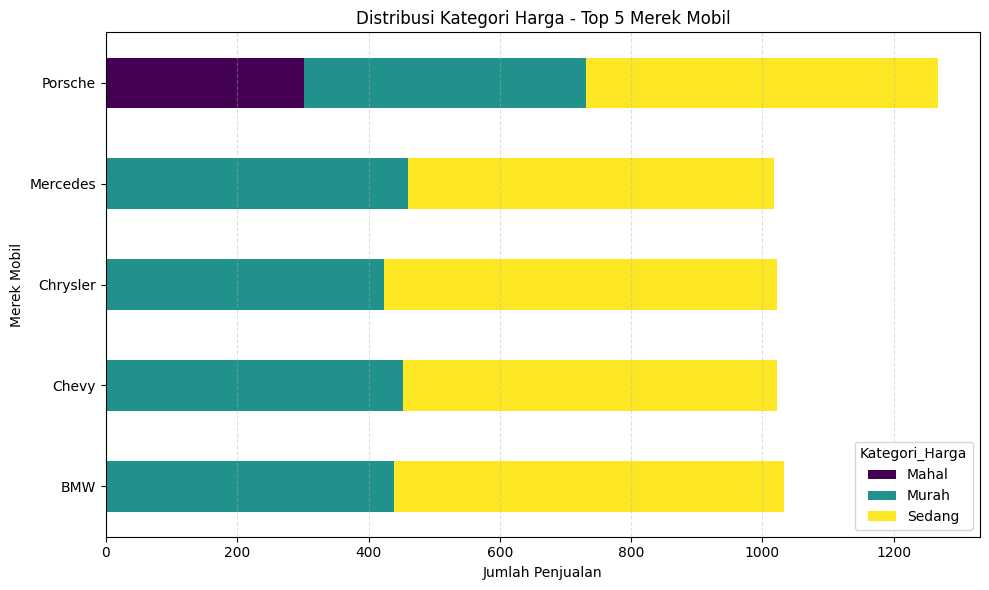

In [ ]:
#Mencari tau top 5 sales masuk dalam kategori harga mana
top5_merek = top5.index.tolist()
df_top5 = car_sales[car_sales['Car Make'].isin(top5_merek)]
df_top5['Kategori_Harga'] = df_top5['Price'].apply(kategorikan_harga)

# Crosstab top 5
top5_pivot = pd.crosstab(df_top5['Car Make'], df_top5['Kategori_Harga'])

# Plot
top5_pivot.plot(kind='barh', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Distribusi Kategori Harga - Top 5 Merek Mobil')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Merek Mobil')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

<ipython-input-22-2297888673>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bottom5['Kategori_Harga'] = df_bottom5['Price'].apply(kategorikan_harga)


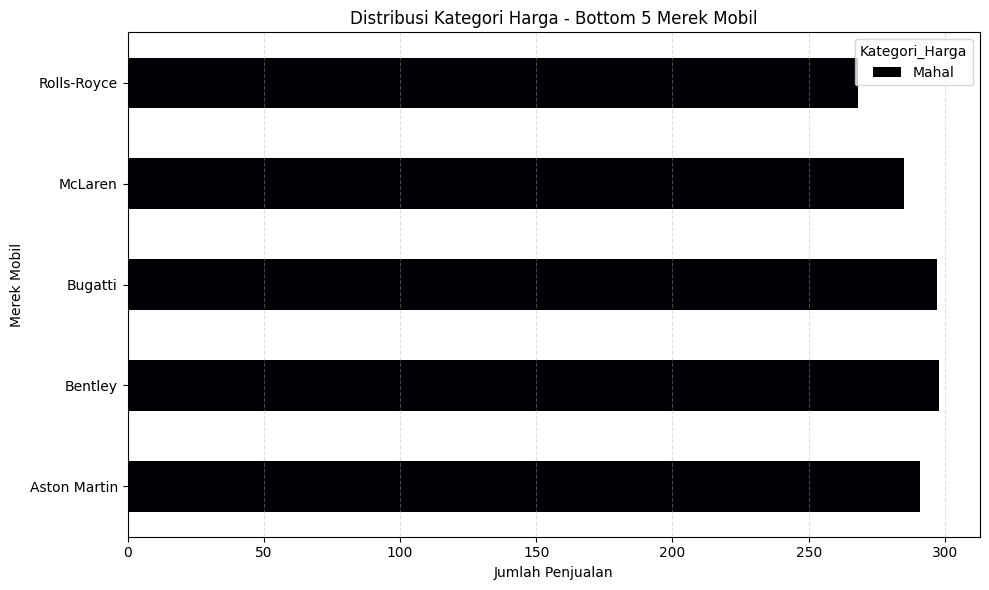

In [ ]:
#Mencari tau bottom 5 sales masuk dalam kategori harga mana
bottom5_merek = bottom5.index.tolist()
df_bottom5 = car_sales[car_sales['Car Make'].isin(bottom5_merek)]
df_bottom5['Kategori_Harga'] = df_bottom5['Price'].apply(kategorikan_harga)

# Crosstab bottom 5
bottom5_pivot = pd.crosstab(df_bottom5['Car Make'], df_bottom5['Kategori_Harga'])

# Plot
bottom5_pivot.plot(kind='barh', stacked=True, figsize=(10,6), colormap='magma')
plt.title('Distribusi Kategori Harga - Bottom 5 Merek Mobil')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Merek Mobil')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Kategori_Harga      Mahal      Murah     Sedang
Feature_Count                                  
1               37.467216  26.801549  35.731235
2                0.000000  42.796525  57.203475
3                0.000000  42.273994  57.726006
4                0.000000  42.811629  57.188371


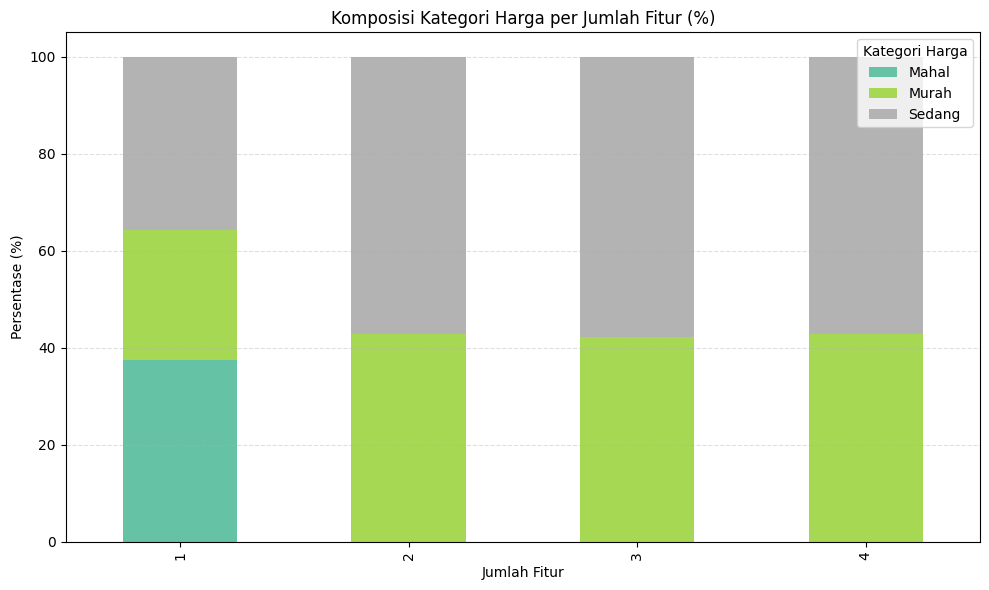

In [ ]:
#Melihat Setiap fiture disi dengan kategori harga mana
pivot_fitur_to_harga = pd.crosstab(car_sales['Feature_Count'], car_sales['Kategori_Harga'], normalize='index') * 100
print(pivot_fitur_to_harga)

pivot_fitur_to_harga.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Komposisi Kategori Harga per Jumlah Fitur (%)')
plt.xlabel('Jumlah Fitur')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Harga')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Kategori_Harga       Mahal      Murah     Sedang
Fuel Type                                       
Diesel           13.183167  37.104942  49.711891
Electric         13.294999  36.452344  50.252657
Gasoline          0.000000  43.531051  56.468949
Hybrid           12.768910  37.005552  50.225538
Petrol          100.000000   0.000000   0.000000


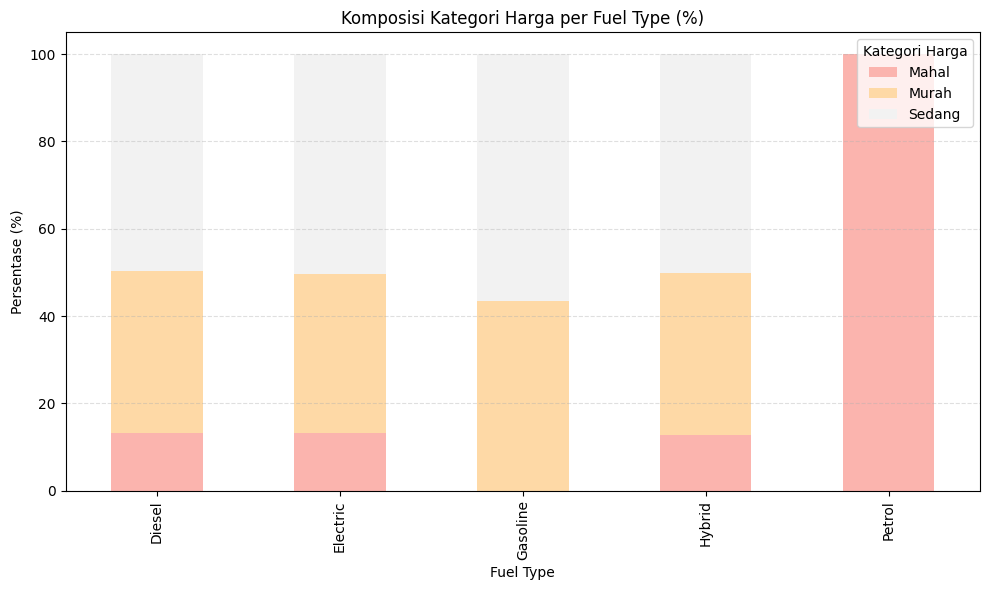

In [ ]:
#Melihat Setiap Fuel type diisi dengan kategori mana
pivot_fuel_vs_harga = pd.crosstab(car_sales['Fuel Type'], car_sales['Kategori_Harga'], normalize='index') * 100
print(pivot_fuel_vs_harga)

pivot_fuel_vs_harga.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')
plt.title('Komposisi Kategori Harga per Fuel Type (%)')
plt.xlabel('Fuel Type')
plt.ylabel('Persentase (%)')
plt.legend(title='Kategori Harga')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()